In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [15]:
data=pd.read_csv("/content/african_crises (1).csv")
print(data.shape)
print("---"*50)
print(data.columns)

(1059, 14)
------------------------------------------------------------------------------------------------------------------------------------------------------
Index(['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')


In [16]:
data.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [18]:
for i in data.columns:
 print(i, "---",data[i].nunique())

case --- 13
cc3 --- 13
country --- 13
year --- 155
systemic_crisis --- 2
exch_usd --- 772
domestic_debt_in_default --- 2
sovereign_external_debt_default --- 2
gdp_weighted_default --- 6
inflation_annual_cpi --- 1022
independence --- 2
currency_crises --- 3
inflation_crises --- 2
banking_crisis --- 2


In [19]:
for case,cc3,country in zip(data["case"].unique(),data["cc3"].unique(),data["country"].unique()):
  print(f"case: {case},cc3: {cc3}, country: {country}")


case: 1,cc3: DZA, country: Algeria
case: 2,cc3: AGO, country: Angola
case: 10,cc3: CAF, country: Central African Republic
case: 15,cc3: CIV, country: Ivory Coast
case: 19,cc3: EGY, country: Egypt
case: 35,cc3: KEN, country: Kenya
case: 38,cc3: MUS, country: Mauritius
case: 40,cc3: MAR, country: Morocco
case: 45,cc3: NGA, country: Nigeria
case: 56,cc3: ZAF, country: South Africa
case: 63,cc3: TUN, country: Tunisia
case: 69,cc3: ZMB, country: Zambia
case: 70,cc3: ZWE, country: Zimbabwe


In [20]:
data=data.drop(["case","cc3"],axis=1)

In [21]:
data.shape

(1059, 12)

In [22]:
data.columns

Index(['country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          1059 non-null   object 
 1   year                             1059 non-null   int64  
 2   systemic_crisis                  1059 non-null   int64  
 3   exch_usd                         1059 non-null   float64
 4   domestic_debt_in_default         1059 non-null   int64  
 5   sovereign_external_debt_default  1059 non-null   int64  
 6   gdp_weighted_default             1059 non-null   float64
 7   inflation_annual_cpi             1059 non-null   float64
 8   independence                     1059 non-null   int64  
 9   currency_crises                  1059 non-null   int64  
 10  inflation_crises                 1059 non-null   int64  
 11  banking_crisis                   1059 non-null   object 
dtypes: float64(3), int64

In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()

data['country']=label_encoder.fit_transform(data['country'])
data["banking_crisis"]=label_encoder.fit_transform(data["banking_crisis"])

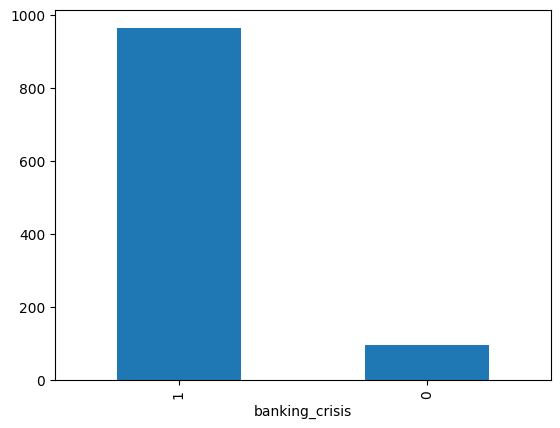

In [27]:
data["banking_crisis"].value_counts().plot(kind="bar")
plt.show()

In [30]:
X=data.drop("banking_crisis",axis=1)
y=data["banking_crisis"]

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [32]:
y_train.value_counts()

banking_crisis
1    772
0     75
Name: count, dtype: int64

In [33]:
from imblearn.over_sampling import SMOTE
smote =SMOTE(random_state=2) # synthetically optimise the minority samples and try to balance the majority class
X_train,y_train = smote.fit_resample(X_train,y_train)

In [34]:
y_train.value_counts()

banking_crisis
1    772
0    772
Name: count, dtype: int64

In [36]:
y_test.value_counts() # test data should not be changed

banking_crisis
1    193
0     19
Name: count, dtype: int64

In [37]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=24)

model.fit(X_train,y_train)

RandomForestClassifier(random_state=24)

In [38]:
y_pred=model.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.9528301886792453


In [41]:
from sklearn.metrics import f1_score
print(f1_score(y_pred,y_test))

0.9738219895287958


In [43]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.70      0.76        23
           1       0.96      0.98      0.97       189

    accuracy                           0.95       212
   macro avg       0.90      0.84      0.87       212
weighted avg       0.95      0.95      0.95       212



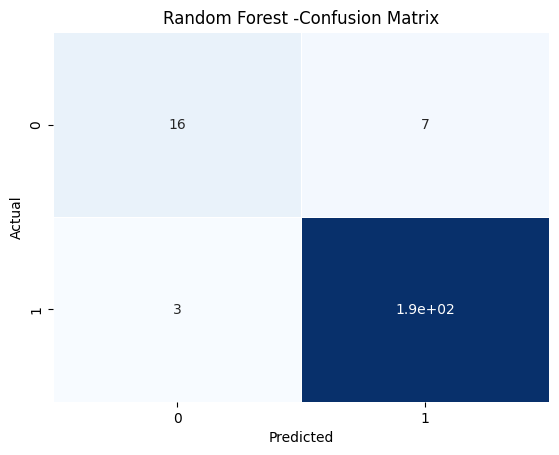

In [44]:
labels=["0","1"]

sns.heatmap(confusion_matrix(y_pred,y_test),cbar=False,cmap="Blues",annot=True,annot_kws={"size":10},linewidths=0.5,xticklabels=labels,yticklabels=labels)
plt.title("Random Forest -Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

* Type 1 error = False Postive = 3

* Type 2 Error = False Negative = 7

* True Positive =16

* True Negative = 190

In [45]:
print(confusion_matrix(y_pred,y_test))

[[ 16   7]
 [  3 186]]


In [46]:
X_test.head()

,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
437,3,2014,0,7.150000e+00,0,0,0.0,10.099000,1,0,0
895,10,2013,0,1.653096e+00,0,0,0.0,5.805000,1,0,0
385,3,1962,0,4.348000e-01,0,0,0.0,-4.203776,1,1,0
979,12,1934,0,4.040000e-27,0,0,0.0,-1.010101,0,0,0
482,5,1992,1,3.621630e+01,0,0,0.0,27.332000,1,1,1


In [47]:
y_test.head()

437    1
895    1
385    1
979    1
482    0
Name: banking_crisis, dtype: int64

In [52]:
import random

random_index =10

random_data_point = X_test.loc[random_index, :].values.reshape(1,-1)

predicted_label = model.predict(random_data_point)

actual_label = y_test[random_index]

print(f"randomly selected index  is {random_index}\n")

print(X_test.loc[random_index, :])

print(f"\nPredicted Label is {predicted_label[0]}")

print(f"\nactual label is {actual_label}")

if predicted_label[0] == actual_label:
  print("\nModel is working well")
else:
  print("\nModel is not good")

randomly selected index  is 10

country                               0.000000
year                               1880.000000
systemic_crisis                       0.000000
exch_usd                              0.052356
domestic_debt_in_default              0.000000
sovereign_external_debt_default       0.000000
gdp_weighted_default                  0.000000
inflation_annual_cpi                  3.881188
independence                          0.000000
currency_crises                       0.000000
inflation_crises                      0.000000
Name: 10, dtype: float64

Predicted Label is 1

actual label is 1

Model is working well
